In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/so2_20180101_20231031 (1).csv')

# Select the column 'V' for prediction
selected_column = '33204020'

# Split the selected column into training and testing sets (80/20 split)
train_data, test_data = train_test_split(dataset[selected_column], test_size=0.2, shuffle=False)

# Define the forecasting horizon (e.g., predict the next 24 hours)
forecast_horizon = 24

# Function to prepare input features and target variable
def prepare_data_for_forecasting(data, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - forecast_horizon):
        X.append(data[i:i+forecast_horizon])
        y.append(data[i+forecast_horizon])
    return np.array(X), np.array(y)

# Prepare input features and target variable for training and testing
X_train, y_train = prepare_data_for_forecasting(train_data.values, forecast_horizon)
X_test, y_test = prepare_data_for_forecasting(test_data.values, forecast_horizon)

# Reshape the data for the Transformer model input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the Transformer encoder layer
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0, name="transformer_encoder"):
    # Normalization and Attention
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = tf.keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = tf.keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = tf.keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = tf.keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = tf.keras.layers.Dropout(dropout)(x)
    x = tf.keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# Define the Transformer model
def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = tf.keras.layers.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
    x = tf.keras.layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = tf.keras.layers.Dense(dim, activation="relu")(x)
        x = tf.keras.layers.Dropout(mlp_dropout)(x)
    outputs = tf.keras.layers.Dense(1, activation="linear")(x)
    return tf.keras.Model(inputs, outputs)

# Set hyperparameters
input_shape = X_train.shape[1:]
head_size = 256
num_heads = 4
ff_dim = 256
num_transformer_blocks = 2
mlp_units = [256]
dropout = 0.2
mlp_dropout = 0.4

# Build the model
model = build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout, mlp_dropout)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model with reduced epochs (10 epochs)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Make predictions on the test data
predictions = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize predictions vs actual values
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Actual vs Predicted for {}'.format(selected_column))
plt.legend()
plt.show()


auto encoders


Epoch 1/50
575/575 [==============================] - 5s 6ms/step - loss: 0.0109 - val_loss: 9.7571e-06
Epoch 2/50
575/575 [==============================] - 3s 5ms/step - loss: 2.3645e-05 - val_loss: 9.7427e-06
Epoch 3/50
575/575 [==============================] - 5s 9ms/step - loss: 2.3638e-05 - val_loss: 9.7322e-06
Epoch 4/50
575/575 [==============================] - 4s 6ms/step - loss: 2.3624e-05 - val_loss: 9.7394e-06
Epoch 5/50
575/575 [==============================] - 3s 5ms/step - loss: 2.3577e-05 - val_loss: 9.7522e-06
Epoch 6/50
575/575 [==============================] - 3s 5ms/step - loss: 1.5153e-05 - val_loss: 1.0060e-05
Epoch 7/50
575/575 [==============================] - 4s 8ms/step - loss: 7.8380e-06 - val_loss: 7.9568e-06
Epoch 8/50
575/575 [==============================] - 3s 5ms/step - loss: 7.5081e-06 - val_loss: 9.5197e-06
Epoch 9/50
575/575 [==============================] - 3s 5ms/step - loss: 6.6490e-06 - val_loss: 6.1294e-06
Epoch 10/50
575/575 [===========

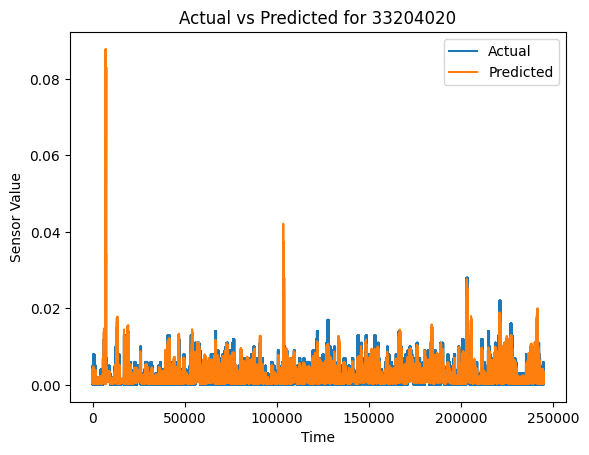

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Load the preprocessed dataset
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/so2_20180101_20231031 (1).csv')

# Select the column 'V' for prediction
selected_column = '33204020'

# Split the selected column into training and testing sets (80/20 split)
train_data, test_data = train_test_split(dataset[selected_column], test_size=0.2, shuffle=False)

# Define the forecasting horizon (e.g., predict the next 24 hours)
forecast_horizon = 24

# Function to prepare input features and target variable
def prepare_data_for_forecasting(data, forecast_horizon):
    X, y = [], []
    for i in range(len(data) - forecast_horizon):
        X.append(data[i:i+forecast_horizon])
        y.append(data[i+forecast_horizon])
    return np.array(X), np.array(y)

# Prepare input features and target variable for training and testing
X_train, y_train = prepare_data_for_forecasting(train_data.values, forecast_horizon)
X_test, y_test = prepare_data_for_forecasting(test_data.values, forecast_horizon)

# Reshape the data for the Autoencoder model input
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the Autoencoder model
def build_autoencoder(input_shape):
    input_layer = tf.keras.layers.Input(shape=input_shape)

    # Encoder
    encoded = tf.keras.layers.Conv1D(32, 3, activation="relu", padding="same")(input_layer)
    encoded = tf.keras.layers.MaxPooling1D(2, padding="same")(encoded)
    encoded = tf.keras.layers.Conv1D(16, 3, activation="relu", padding="same")(encoded)
    encoded = tf.keras.layers.MaxPooling1D(2, padding="same")(encoded)

    # Decoder
    decoded = tf.keras.layers.Conv1D(16, 3, activation="relu", padding="same")(encoded)
    decoded = tf.keras.layers.UpSampling1D(2)(decoded)
    decoded = tf.keras.layers.Conv1D(32, 3, activation="relu", padding="same")(decoded)
    decoded = tf.keras.layers.UpSampling1D(2)(decoded)

    output_layer = tf.keras.layers.Conv1D(1, 3, activation="sigmoid", padding="same")(decoded)

    autoencoder = tf.keras.models.Model(input_layer, output_layer)
    return autoencoder

# Set the input shape
input_shape = X_train.shape[1:]

# Build the Autoencoder model
autoencoder = build_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, validation_split=0.1)

# Make predictions on the test data
predictions = autoencoder.predict(X_test)

# Reshape predictions to match original input shape
predictions = predictions.reshape((predictions.shape[0], predictions.shape[1]))

# Reshape X_test to 2D
X_test_2d = X_test.reshape((X_test.shape[0], X_test.shape[1]))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(X_test_2d, predictions))
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize predictions vs actual values
plt.plot(X_test_2d.flatten(), label='Actual')
plt.plot(predictions.flatten(), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Sensor Value')
plt.title('Actual vs Predicted for {}'.format(selected_column))
plt.legend()
plt.show()
